# CPSC380:  4_Visualization_2_SimplePlots

In this notebook, you will learn the followings:
 - Line Plots
 - Scatter Plots
 - Histogram
 - Kernel Density Estimation (KDE)
 
Read more: 
 - Python Data Science textbook 
  - https://jakevdp.github.io/PythonDataScienceHandbook/04.01-simple-line-plots.html
  - https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html
  - https://jakevdp.github.io/PythonDataScienceHandbook/04.05-histograms-and-binnings.html

## 1. Line Plots

In [429]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

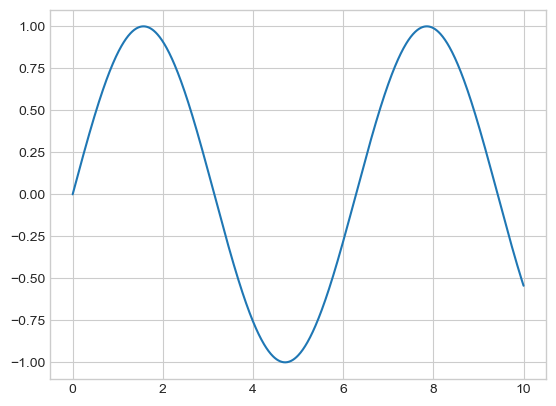

In [430]:
# object-oriented interface
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

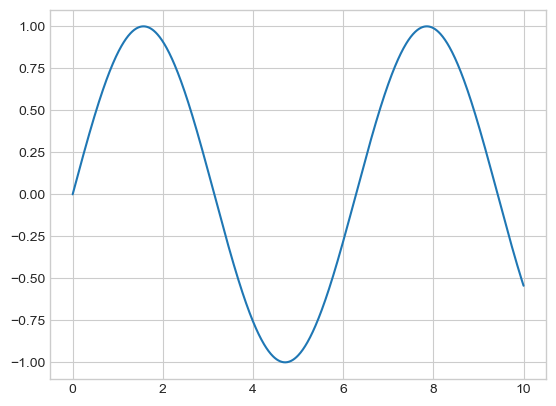

In [431]:
# matlab-style interface
plt.plot(x, np.sin(x));

If we want to create a single figure with multiple lines, we can simply call the ``plot`` function multiple times:

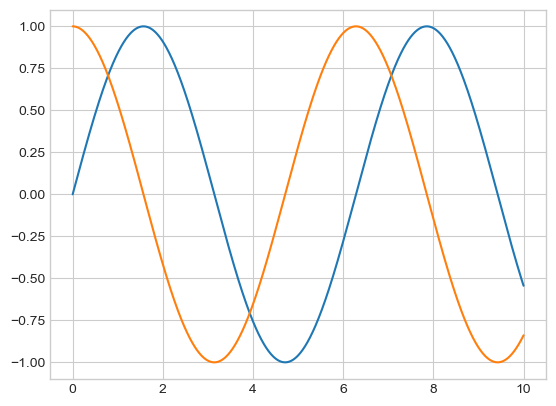

In [432]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

### 1.1.  Line Colors and Styles

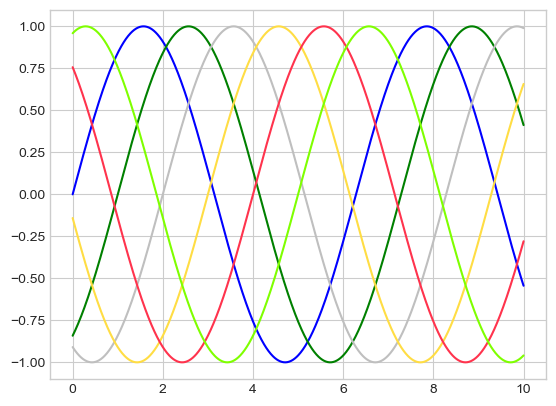

In [433]:
# To adjust the color, you can use the color keyword.
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

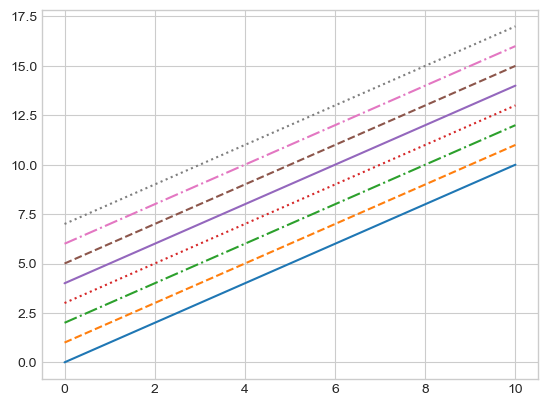

In [434]:
# the line style can be adjusted using the linestyle keyword:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')   # solid
plt.plot(x, x + 5, linestyle='--')  # dashed
plt.plot(x, x + 6, linestyle='-.')  # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

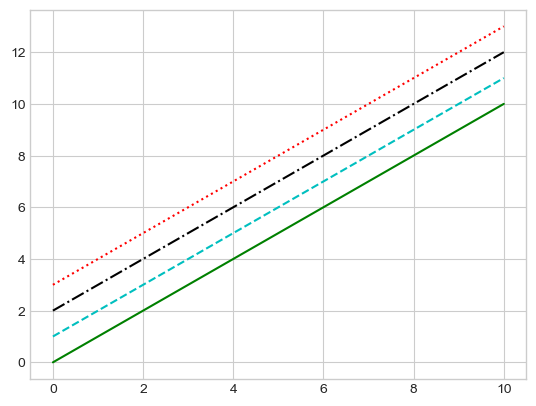

In [435]:
# linestyle and color codes can be combined into a single non-keyword argument
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

### 1.2. Axes Limits

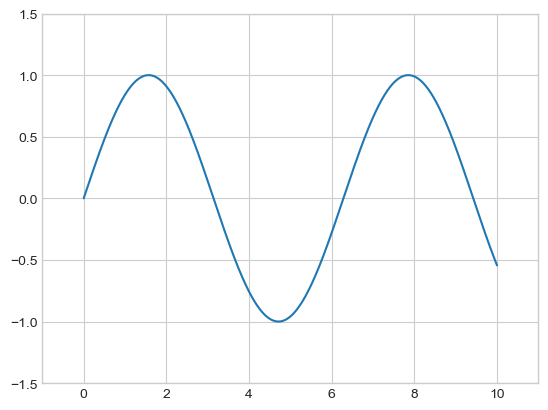

In [436]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

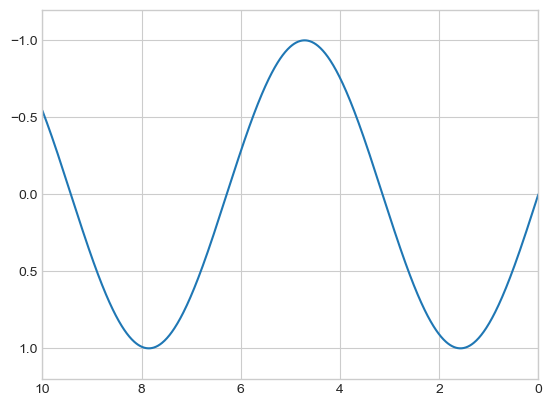

In [437]:
# reverse the order of the arguments:
plt.plot(x, np.sin(x))

plt.xlim(10, 0)
plt.ylim(1.2, -1.2);

A useful related method is ``plt.axis()`` (note here the potential confusion between *axes* with an *e*, and *axis* with an *i*).
The ``plt.axis()`` method allows you to set the ``x`` and ``y`` limits with a single call, by passing a list which specifies ``[xmin, xmax, ymin, ymax]``:

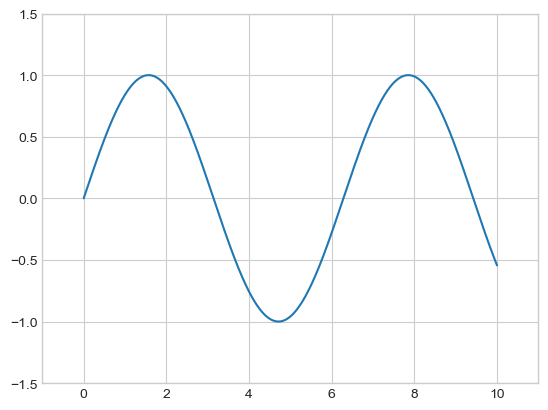

In [438]:
# The plt.axis() specifies [xmin, xmax, ymin, ymax]
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);

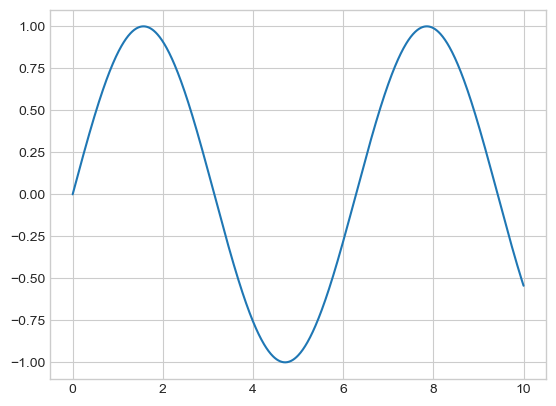

In [439]:
# automatically tighten the bounds
plt.plot(x, np.sin(x))
plt.axis('tight');

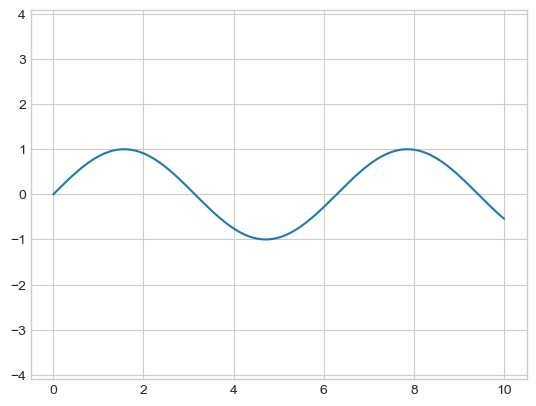

In [440]:
# equal aspect ratio of x and y units
plt.plot(x, np.sin(x))
plt.axis('equal');

### 1.3.  Labeling Plots

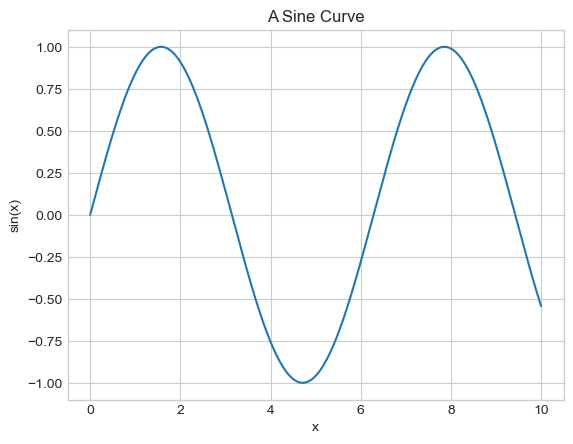

In [441]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

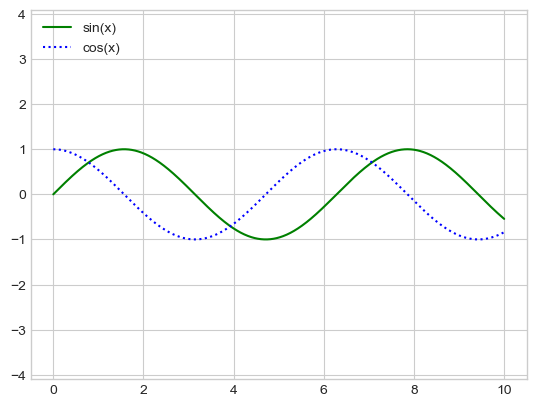

In [442]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend(loc="upper left")

###  Relationship between Legend and Label

Legend is a broad label for a group of objects that you would like to label, whereas label is just for labeling specific elements.

## 2. Scatter Plots

In [443]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

### 2.1. Scatter Plots with ``plt.plot``

 - use ``plt.plot``/``ax.plot`` to produce scatter plots as well:

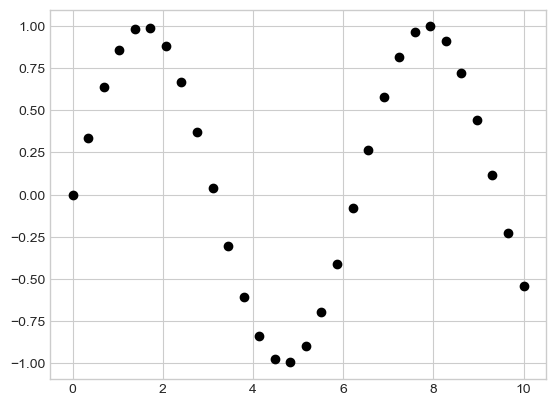

In [444]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

#plt.plot(x, y,      color='black'); # line
plt.plot(x, y, 'o', color='black'); # scatter plot (marker)

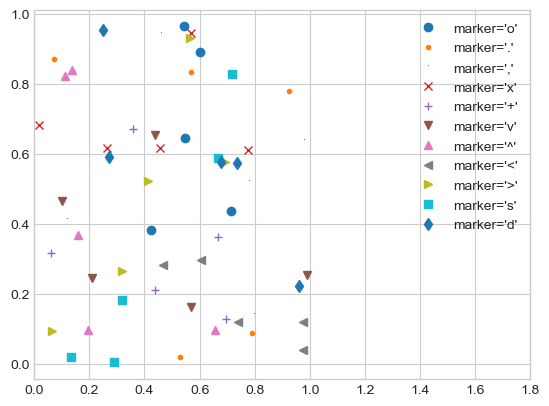

In [445]:
# marker styles
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    xi, yi = rng.rand(5), rng.rand(5)
    plt.plot(xi, yi, marker, label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

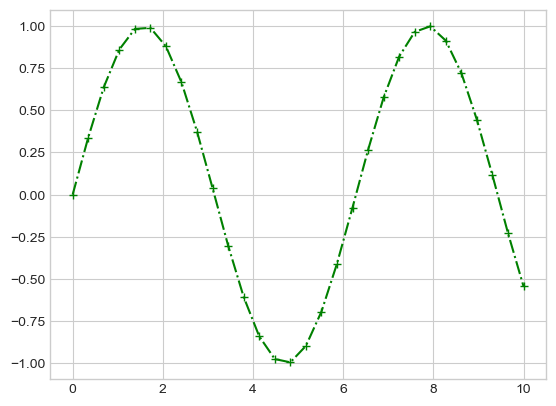

In [446]:
# marker (+) + line style (-.) + color (green)
plt.plot(x, y, '-.+g');

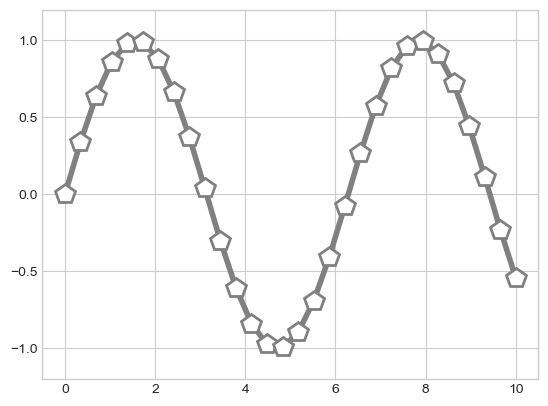

In [447]:
# p? https://matplotlib.org/stable/api/markers_api.html
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

### 2.2. Scatter Plots with ``plt.scatter``

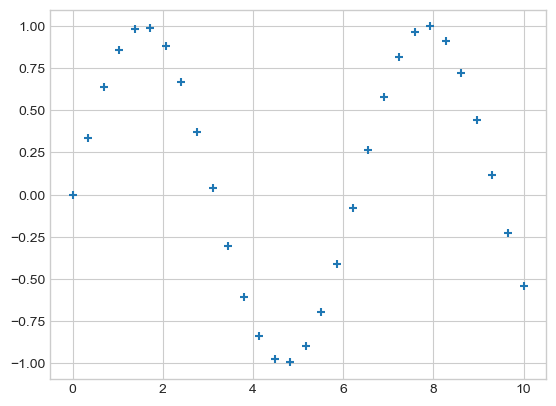

In [448]:
plt.scatter(x, y, marker='+');

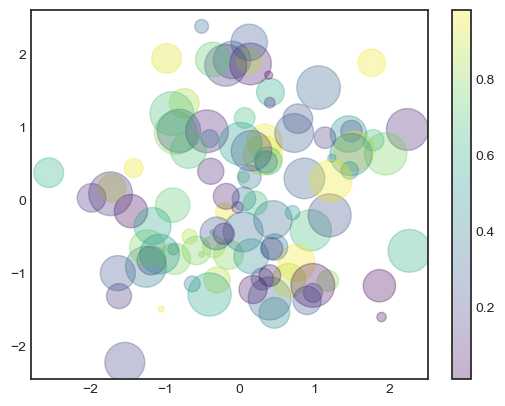

In [462]:
# Scatter plots can control each individual point (size, face color, edge color, etc.)
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar();  # show color scale

Choosing Colormaps in Matplotlib:
https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [469]:
from sklearn.datasets import load_iris

# get the iris from sklearn package
iris = load_iris()

# get the data (transposed, with each row containg  150 values for each feature) and targets
features = iris.data.T
feature_names = iris.feature_names
targets = iris.target

print("Data type: ", type(iris), type(iris.data))
print("Shape: ", features.shape)
print("Target values:", set(targets))
print ("Feature names: ", feature_names)

Data type:  <class 'sklearn.utils.Bunch'> <class 'numpy.ndarray'>
Shape:  (4, 150)
Target values: {0, 1, 2}
Feature names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Text(0, 0.5, 'sepal width (cm)')

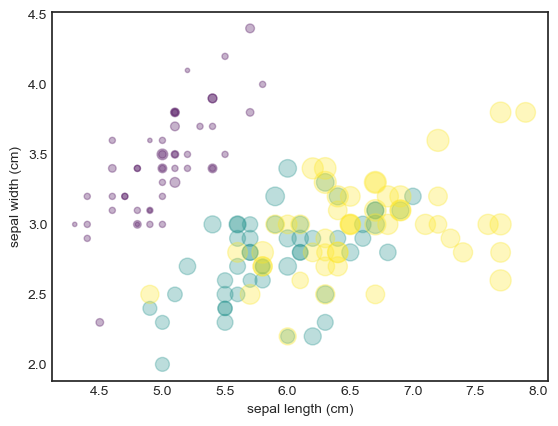

In [473]:
# (x, y) location of each point corresponds to the sepal length and width, 
# the size of the point is related to the petal width, 
# the color is related to the particular species of flower.
plt.scatter(features[0], features[1], alpha=0.3, s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])


## 3. Histograms

In [479]:
plt.style.use('seaborn-white')

data = np.random.randn(1000)

#print (data)

### 3.1. One-dimensional histogram

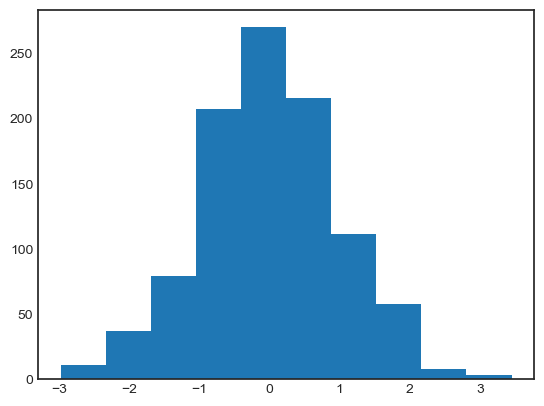

In [480]:
plt.hist(data);

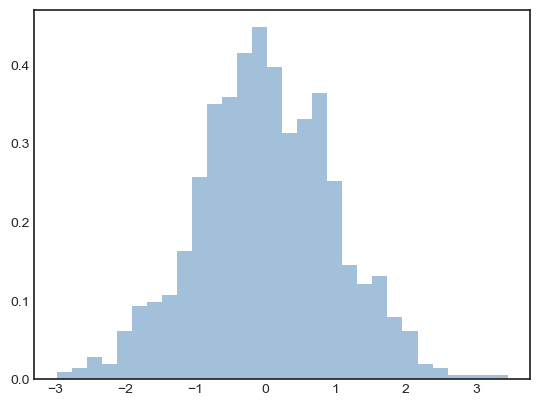

In [489]:
# density = True: each bin will display the bin's raw count 
# divided by the total number of counts and the bin width
# alpha: regulates the transparency of a graph plot

plt.hist(data, bins=30,  density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');


### histtype{'bar', 'barstacked', 'step', 'stepfilled'}, default: 'bar'
The type of histogram to draw.

**'bar'** is a traditional bar-type histogram. If multiple data are given the bars are arranged side by side.

**'barstacked'** is a bar-type histogram where multiple data are stacked on top of each other.

**'step'** generates a lineplot that is by default unfilled.

**'stepfilled'** generates a lineplot that is by default filled.


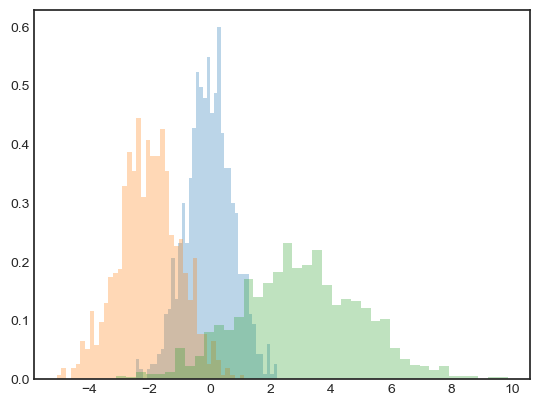

In [492]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='barstacked', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

### 3.2. Two-dimensional histogram

In [495]:
# ``x`` and ``y`` array drawn from a multivariate Gaussian distribution:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

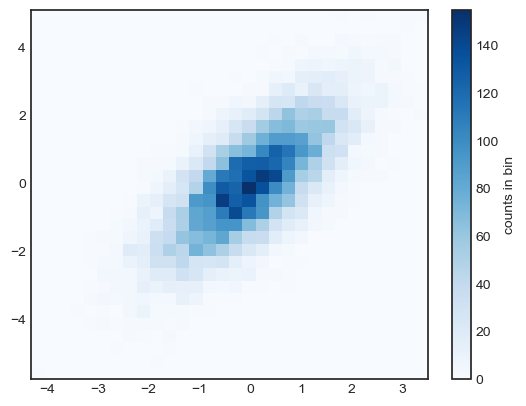

In [496]:
#plt.hist2d: Two-dimensional histogram
plt.hist2d(x, y, bins=30, cmap='Blues')
plt

cb = plt.colorbar()
cb.set_label('counts in bin')

## 4. Kernel Density Estimation (KDE)

Kernel density estimation (KDE) is a non-parametric way to estimate the **probability density function** of a random variable. Kernel density estimation is a fundamental **data smoothing** problem where inferences about the population are made, based on a finite data sample. 

(-3.0, 11.0)

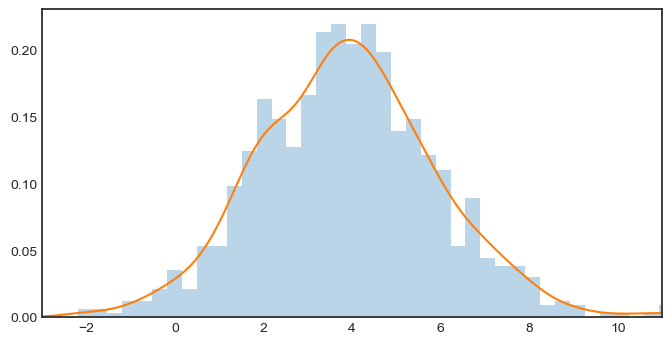

In [498]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
#np.random.seed(41)

x = np.random.normal(4, 2, 1000)

# histogram
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(x, density=True, bins=40, alpha=0.3)

# # kde
kde = stats.gaussian_kde(x)
xx = np.linspace(-3, 11, 1000)
ax.plot(xx, kde(xx))

ax.set_xlim(-3, 11)

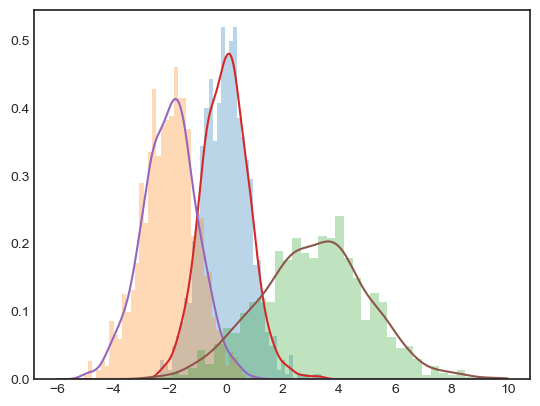

In [499]:
from scipy import stats

x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

# histgram plot
kwargs = dict(histtype='barstacked', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)

# kde plot
kde1 = stats.gaussian_kde(x1)
kde2 = stats.gaussian_kde(x2)
kde3 = stats.gaussian_kde(x3)

xx = np.linspace(-6, 10, 1000)

plt.plot(xx,kde1(xx))
plt.plot(xx,kde2(xx))
plt.plot(xx,kde3(xx))